# Introduction to Granger Causality

Prepared by Kristian Mamforte

### 1. Introduction
Having discussed the univariate the multivariate time series analyses, we are now ready to introduce the notion of causality between processes. In this notebook, we discuss the concept of causality proposed by the econometrician Clive W.J. Granger in 1969. This Granger Causality test is a powerful tool to detect any linear relationship between two processes and uses the mathematical foundation of multivariate analysis and OLS regression to define existence of causality.

### 2. Learning Objectives <a class="anchor" id="chapter1"></a>



* Learn Granger Causality Test, from mathematical formulation to limits and assumptions
* Know the steps to perform Granger Causality Test
* Perform Granger Causality Test on actual data
  * Does oil price affect Tesla stock price?
  * Which of the M6 stock prices Granger cause another?

### 3. Intuition

**In a nutshell, Granger Causality** can be understood by the following. Suppose we have two different models to predict a process $Y_t$: 

* a model that only uses the history of $Y_t$;
* a model that also use another variable $X_t$ aside from the history of $Y_t$

The first model is just the univariate time series analysis that we are familiar with, while the second is multivariate. If the second model greatly lowered the "error" in prediction, then we say the $X_t$ carries a valuable information to predict the process of $Y_t$, i.e. $X_t$ Granger-causes $Y_t$. In the image below, it is depicted by a less volatile error process in blue than a more volatile error process in orange. By now you can easily see how we set up the hypothesis testing.

<div>
<img src='Granger1.png' width="500"/>
</div>

Mathematically, let 
* $e_h$: forecast error obtained  by forecasting $y_{T+h}$ based on $\mathcal{I}=\{y_T, x_T, y_{T-1}, x_{T-1},...\}$\, i.e. $e_h=y_{T+h}-E(y_{T+h}|\mathcal{I})$
* $\tilde{e}_h$ be the forecast error obtained by forecasting $y_{T+h}$ based on $\tilde{\mathcal{I}}=\{y_T,  y_{T-1},...\}$, i.e. $\tilde{e}_h=y_{T+h}-E(y_{T+h}|\tilde{\mathcal{I}})$

That is, $\mathcal{I}$ holds additional information about another series $x$ compared to $\tilde{\mathcal{I}}$.
> We say that the series $x$ Granger causes $y$ if
$\sigma^2(e_h)<\sigma^2(\tilde{e}_h)$.

We will use F-test to determine goodness of fit: $F = \frac{\frac{\widetilde{RSS}-RSS}{\tilde{p}-p}}{\frac{RSS_2}{n-p}}$.





### 4. Mathematical Formulation of Granger Causality Test


#### Definitions <a class="anchor" id="section_3_1"></a>


We begin by describing the notations. 

(a) $A_t$ := stationary stochastic process (at least weak stationary)

(b) $\overline{A_{t}}$:= set of past values of $A_t$ i.e. $\{A_{t-j}:j=k,k+1,...,\infty\}$ for $k>=0$. 
*   $\overline{A(k)}$ is the set of past values $A_{t-k},A_{t-k-1},...$
* $\bar{\bar{A_t}}$ is the set of present and past values $A_t,A_{t-1},...$

(c) $P_t(A|B)$ := optimum, unbiased, least-squares predictor of $A_t$ using the set of realized values of $B_t$.
* $P_t(X|\overline{X_{-1}})$is the optimum predictor of $X_t$ using only past realizations of $X_t$.

(d) $\epsilon_t(A|B)=A_t-P_t(A|B)$ := time series of prediction errors

(e) $\sigma^2(A|B)$:= variance of $\epsilon_t(A|B)$

(f) $U_t$:=all the information in the universe accumulated since time $t-1$

(g) $U_t - Y_t$ := all the information $U_t$ apart from the specified stationary series $Y_t$



##### Definition 1: Causality
If $\sigma^2(X|U) < \sigma^2(X|\overline{(U-Y)}$, we say that $Y$ is causing $X$, denoted by $Y_t\Rightarrow X_t$. We say that $Y_t$ is causing $X_t$ if we are better able to predict $X_t$ using all the available information that if the information apart from $Y_t$ had been used.



##### Defintion 2: Feedback
If $\sigma^2(X|\overline{U})<\sigma^2(X|\overline{U-Y})$ and $\sigma^2(Y|\overline{U})<\sigma^2(X|\overline{U-X})$, we say that feedback is occurring, which is denoted $Y_t\Longleftrightarrow X_t$, i.e. feedback is said to occur when $X_t$ is causing $Y_t$ and also $Y_t$ is causing $X_t$.



##### Definition 3: Instantaneous Causality
If $\sigma^2(X|\overline{U},\overline{\overline{Y}}) < \sigma^2(X|\overline{U})$, we say that instantaneous causality $Y_t\Longleftrightarrow X_t$ is occurring. In other words, the current value of $X_t$ is better "predicted" if the present value of $Y_t$ is included in the "prediction" than it is not.



##### Definition 4: Causality Lag
if $Y_t\Rightarrow X_t$, we define the (integer) lag $m$ to be the least value of $k$ such that $\sigma^2(X|U-Y(k)) < \sigma^2(X|U-Y(k+1))$. Thus knowing the values $Y_{t-j}, j=0,1,...,m-1$ will be of no help in improving the prediction of $X_t$.

### Assumptions

1. $X_t$ and $Y_t$ are assumed to be stationary.
2. $P_t(A|B)$ is already optimized.

### Limitations and Notes
1. The Granger Causality Test is dependent on the universe of information $U$ that you are in. One process can G-cause another in a universe $U$ but is not in the expanded $U'$. For example, suppose\begin{equation}
X_t=A_{t-1} + ϵ_t\\
Y_t=A_t+α_t\\
Z_t=A_t+β_t
\end{equation}where $A_t$ is stationary and $ϵ_t, α_t, β_t$ are all uncorellated    white-noise series with equal variances. Then within the set $D=(X_t,Y_t), Y_t\Rightarrow X_t$ and within $D'=(X_t,Z_t), Z_t\Rightarrow X_t$. But within the set $D=(X_t,Y_t,Z_t), Y_t\nRightarrow X_t$ and $Z_t\nRightarrow X_t$.

2. For purely deterministic series which can be predicted exactly from its past terms such as a non-stochastic series, the defintion of causality above will fail to establish causality between two such series. For insatnce, if $X_t = bt$ and $Y_t=c(t+1)$. Then $X_t$ can be predicted exactly by $b+X_{t-1}$ or by $(b/c)Y_{t-1}$. Thus there's no way to tell if $Y_t$ is a causal factor of $X_t$ or not.

3. In practice, it will not usually be possible to use completely optimum predictors, unless all sets of series are assumed to be normally distributed.

4. This test only works if there is a linear relationship between the two variables; it won't be able to test any non-linear causal relationship. For example, the the 



### Model

Let $X_t$ and $Y_t$ be stationary time series with zero means.


**Simple Causal Model**


\begin{equation}
X_t = \Sigma_{j=1}^{m} a_jX_{t-j} + \Sigma_{j=1}^{m} b_jY_{t-j} + \epsilon_t\\
Y_t = \Sigma_{j=1}^{m} c_jX_{t-j} + \Sigma_{j=1}^{m} d_jY_{t-j} + \eta_t
\end{equation}


where $m$ is finite;
$ \epsilon_t, \eta_t $are uncorrelated white-noise series, i.e. $E[\epsilon_t,\epsilon_s]=0=E[\eta_t,\eta_s]$ for $s\neq t$.


By the definition above, $Y_t$ Granger-causes $X_t$ if at least one of $b_j$'s are non-zero. Similarly, $X_t$ Granger-causes $Y_t$ if at least one of $c_j$'s are non-zero. There is a feedback relationship if both statements hold.


**General causal model with instantaneous causality**


\begin{equation}
X_t + b_0Y_t= \Sigma_{j=1}^{m} a_jX_{t-j} + \Sigma_{j=1}^{m} b_jY_{t-j} + \epsilon_t\\
Y_t +c_0X_t= \Sigma_{j=1}^{m} c_jX_{t-j} + \Sigma_{j=1}^{m} d_jY_{t-j} + \eta_t
\end{equation}


### Hypothesis Testing

We test if one series G-causes the other. 

> $H_0$: The series $X_t$ does not G-cause $Y_t$, (i.e. $c_j$'s are all zero)
\
> $H_1$: The series $X_t$ G-causes $Y_t$ (i.e. at least one of $c_j$'s is non-zero)



**Methods of Testing**


We will use the $F$-test to test for the goodness of fit of the model and the $t$-test to test where an independent variable is statistically associated with a dependent variable.

### Steps

1. Determine if $Y_t$ and $X_t$ are stationary and if not, determine the integration (differencing) needed to be make them stationary.
2. Determine the optimal lag length $p$.
3. Set the null and alternative hypotheses.
4. Calculate the test-statistics (we will use the grangercausalitytests module from statsmodels).

### 4. Implementation 
Let us now try to implement this. First, we import the necessary libraries.


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import lag_plot

from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.stattools import adfuller, kpss, grangercausalitytests

import warnings
warnings.filterwarnings("ignore")

In [3]:
def lag_plots(data_df):
    """
    If our data is random, this plot will have no pattern. 
    """
    s = len(data_df.columns)
    f, axs = plt.subplots(s, 1, figsize=(8, s*5))
    
    for i in range(s):
        lag_plot(data_df[data_df.columns[i]], ax=axs[i])
        axs[i].set_title(data_df.columns[i]);
        axs[i].set_ylabel('$y_{t+1}$');
        axs[i].set_xlabel('$y_t$');

    plt.tight_layout()

In [4]:
def kpss_test(data_df):
    """
    KKwiatkowski-Phillips-Schmidt-Shin (KPSS) test for stationarity
    
    """
    
    test_stat, p_val = [], []
    cv_1pct, cv_2p5pct, cv_5pct, cv_10pct = [], [], [], []
    for c in data_df.columns: 
        kpss_res = kpss(data_df[c].dropna(), regression='ct')
        test_stat.append(kpss_res[0])
        p_val.append(kpss_res[1])
        cv_1pct.append(kpss_res[3]['1%'])
        cv_2p5pct.append(kpss_res[3]['2.5%'])
        cv_5pct.append(kpss_res[3]['5%'])
        cv_10pct.append(kpss_res[3]['10%'])
    kpss_res_df = pd.DataFrame({'Test statistic': test_stat, 
                               'p-value': p_val, 
                               'Critical value - 1%': cv_1pct,
                               'Critical value - 2.5%': cv_2p5pct,
                               'Critical value - 5%': cv_5pct,
                               'Critical value - 10%': cv_10pct}, 
                             index=data_df.columns).T
    kpss_res_df = kpss_res_df.round(4)
    
    result = [] #compare p-value with alpha = 0.05
    for col in kpss_res_df.columns:
        if kpss_res_df.loc["p-value", col] < 0.05:
            result.append("not stationary")
        else:
            result.append("stationary")
    kpss_res_df.loc['result'] = result
    
    return kpss_res_df

In [5]:
def adf_test(data_df):
    """
    Augmented Dickey-Fuller (ADF) test for stationarity
    """
    
    test_stat, p_val = [], []
    cv_1pct, cv_5pct, cv_10pct = [], [], []
    for c in data_df.columns: 
        adf_res = adfuller(data_df[c].dropna())
        test_stat.append(adf_res[0])
        p_val.append(adf_res[1])
        cv_1pct.append(adf_res[4]['1%'])
        cv_5pct.append(adf_res[4]['5%'])
        cv_10pct.append(adf_res[4]['10%'])
    adf_res_df = pd.DataFrame({'Test statistic': test_stat, 
                               'p-value': p_val, 
                               'Critical value - 1%': cv_1pct,
                               'Critical value - 5%': cv_5pct,
                               'Critical value - 10%': cv_10pct}, 
                             index=data_df.columns).T
    adf_res_df = adf_res_df.round(4)

    result = [] #compare p-value with alpha = 0.05
    for col in adf_res_df.columns:
        if adf_res_df.loc["p-value", col] < 0.05:
            result.append("stationary")
        else:
            result.append("not stationary")
    adf_res_df.loc['result'] = result    
    
    return adf_res_df

In [6]:
def splitter(data_df):
    """
    Split dataset to set the first part as training set
    and the second part as test set
    """
    
    end = round(len(data_df)*0.8)
    train_df = data_df[:end]
    test_df = data_df[end:]
    
    return train_df, test_df

In [7]:
def select_p(train_df):
    """
    Select the VAR order  p  by computing the 
    different multivariate information criteria (AIC, BIC, HQIC), and FPE.
    """
    
    aic, bic, fpe, hqic = [], [], [], []
    model = VAR(train_df) 
    p = np.arange(1,60)
    for i in p:
        result = model.fit(i)
        aic.append(result.aic)
        bic.append(result.bic)
        fpe.append(result.fpe)
        hqic.append(result.hqic)
    lags_metrics_df = pd.DataFrame({'AIC': aic, 
                                    'BIC': bic, 
                                    'HQIC': hqic,
                                    'FPE': fpe}, 
                                   index=p)    
    fig, ax = plt.subplots(1, 4, figsize=(15, 3), sharex=True)
    lags_metrics_df.plot(subplots=True, ax=ax, marker='o')
    plt.tight_layout()
    print(lags_metrics_df.idxmin(axis=0))

In [8]:
def granger_causation_matrix(data, variables, p, test = 'ssr_chi2test', verbose=False):
    
    """
    Check Granger Causality of all possible combinations of the time series.
    The rows are the response variables, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], p, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(p)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

In [9]:
def granger_conclusion(df_granger_matrix):
    x = df_granger_matrix.columns[0]
    y = df_granger_matrix.index[1]

    if df_granger_matrix.loc[y,x] < 0.05:
        print(f"{x} Granger causes {y}")
    else:
        print(f"{x} does NOT Granger {y}")

    x = df_granger_matrix.columns[1]
    y = df_granger_matrix.index[0]

    if df_granger_matrix.loc[y,x] < 0.05:
        print(f"{x} Granger causes {y}")
    else:
        print(f"{x} does NOT Granger {y}")

### Example 1: Does crude oil affect Tesla stock price?

In this study, we will conduct Granger Causality Test between crude oil and the stock price of Tesla. It's interesting to find out if somehow oil prices is a good predictor of the movement of Tesla stock price.

### Import your data

Here we we will use the per minute time series data of crude oil and Tesla stock price on Oct 13, 2022.

In [10]:
import pandas as pd
data = pd.read_csv(r'../data/Tesla_CrudeOil.csv')
data = data.set_index('Datetime',drop=True)

#rename columns
data = data.rename(columns={'CL=F':'Crude Oil','TSLA':'Tesla'})
# Print first 5 rows of the data
print(data.head())
print(type(data))

                           Crude Oil       Tesla
Datetime                                        
2022-10-13 09:30:00-04:00  86.570000  209.660004
2022-10-13 09:31:00-04:00  86.760002  208.600006
2022-10-13 09:32:00-04:00  86.650002  206.580002
2022-10-13 09:33:00-04:00  86.870003  207.250000
2022-10-13 09:34:00-04:00  87.040001  208.670105
<class 'pandas.core.frame.DataFrame'>


Let's check if there are null data:

In [11]:
data.isnull().sum()

Crude Oil    0
Tesla        0
dtype: int64

There are no null data, so the data is good. Next, we plot the data to get a sense on the movement of the process.

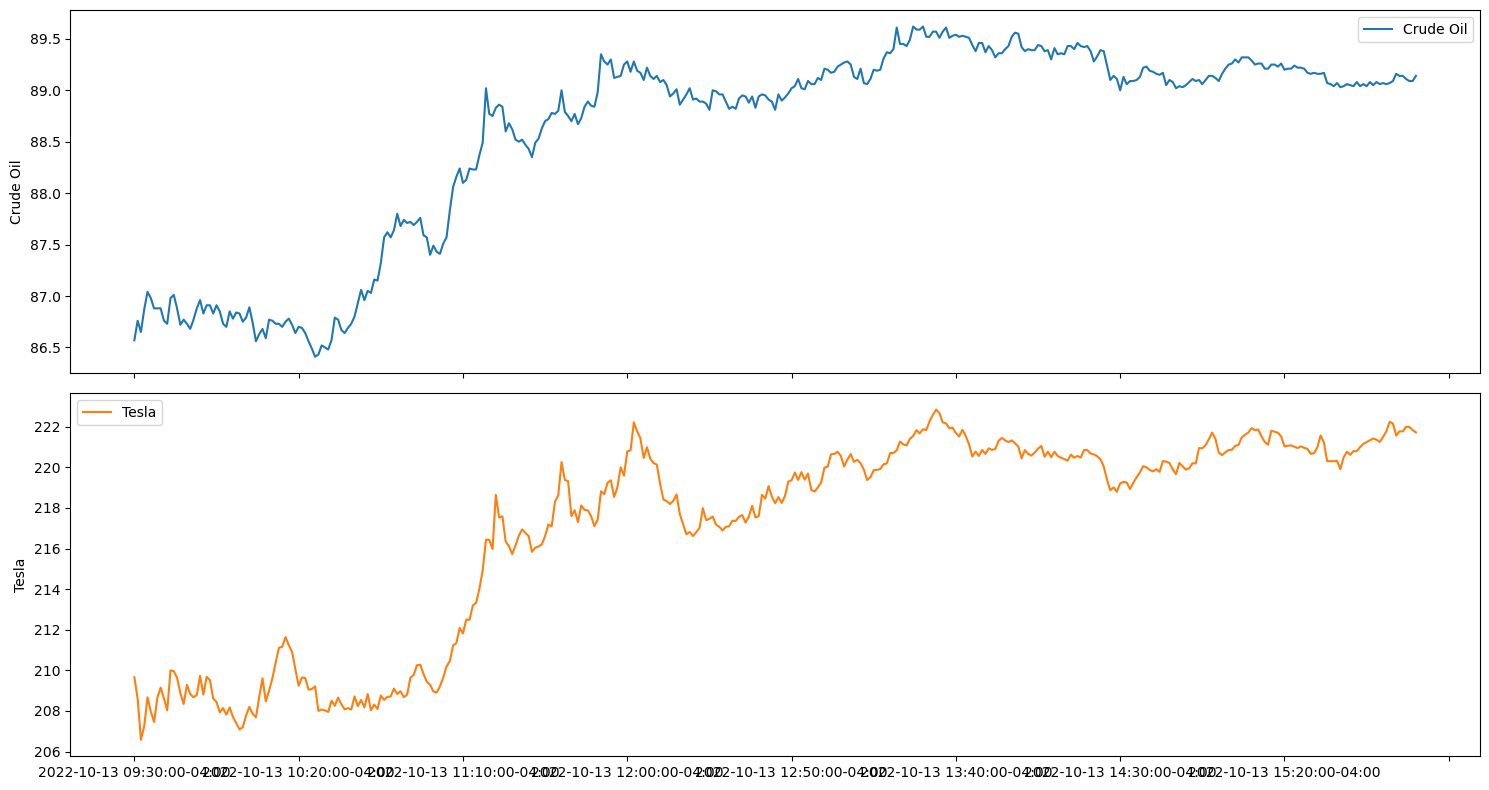

In [12]:
fig,ax = plt.subplots(2, figsize=(15,8), sharex=True)
plot_cols = ['Crude Oil', 'Tesla']
data[plot_cols].plot(subplots=True, legend=True, ax=ax)
for a in range(len(ax)): 
    ax[a].set_ylabel(plot_cols[a])
ax[-1].set_xlabel('')
plt.tight_layout()
plt.show()

Let's sense-check if the time series are stationary.

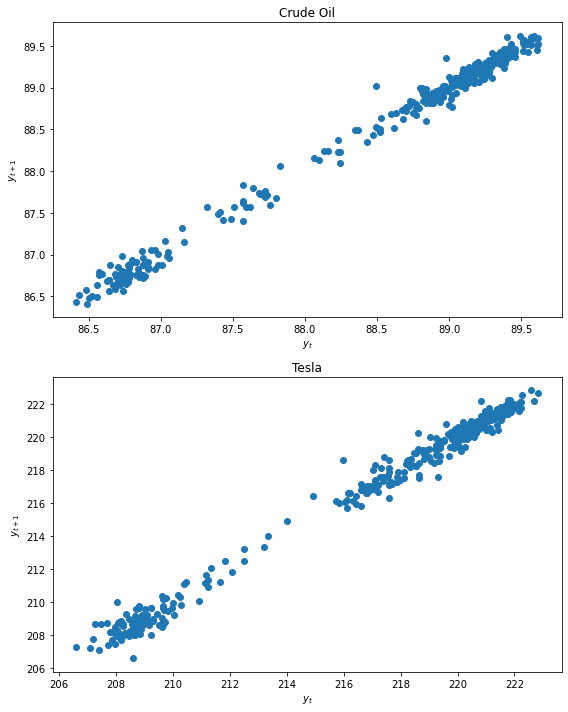

In [23]:
lag_plots(data)

The plots show a trend, hence not stationary. For this to be stationary, we expect them to behave randomly. Let's confirm with ADF and KPSS tests.

In [24]:
print('ADF Test\n')
adf_test(data)

ADF Test



,Crude Oil,Tesla
Test statistic,-1.9924,-1.8577
p-value,0.2899,0.3522
Critical value - 1%,-3.4472,-3.4473
Critical value - 5%,-2.869,-2.869
Critical value - 10%,-2.5707,-2.5708
result,not stationary,not stationary


In [25]:
print('KPSS Test\n')
kpss_test(data)

KPSS Test



,Crude Oil,Tesla
Test statistic,0.4814,0.4068
p-value,0.01,0.01
Critical value - 1%,0.216,0.216
Critical value - 2.5%,0.176,0.176
Critical value - 5%,0.146,0.146
Critical value - 10%,0.119,0.119
result,not stationary,not stationary


Both ADF and KPSS tests show that they are not stationary. We do 1-differencing.

In [26]:
data_diff1 = pd.DataFrame()
data_diff1['Crude Oil'] = data['Crude Oil'] - data['Crude Oil'].shift(1)
data_diff1['Tesla'] = data['Tesla'] - data['Tesla'].shift(1)
data_diff1 = data_diff1.dropna()

We check again if they are still not stationary

In [27]:
print('ADF Test\n')
adf_test(data_diff1)

ADF Test



,Crude Oil,Tesla
Test statistic,-20.9399,-14.339
p-value,0.0,0.0
Critical value - 1%,-3.4473,-3.4473
Critical value - 5%,-2.869,-2.869
Critical value - 10%,-2.5707,-2.5708
result,stationary,stationary


In [28]:
print('KPSS Test\n')
kpss_test(data_diff1)

KPSS Test



,Crude Oil,Tesla
Test statistic,0.0572,0.0664
p-value,0.1,0.1
Critical value - 1%,0.216,0.216
Critical value - 2.5%,0.176,0.176
Critical value - 5%,0.146,0.146
Critical value - 10%,0.119,0.119
result,stationary,stationary


Both now shows stationary results. 

We are ready to create our VAR model. Let's start by splitting our data into training and testing.

In [29]:
train_df, test_df = splitter(data_diff1)

We then select the optimum VAR order $p$ by computing the different multivariate information criteria (AIC, BIC, HQIC) and FPE.

AIC     4
BIC     1
HQIC    3
FPE     4
dtype: int64


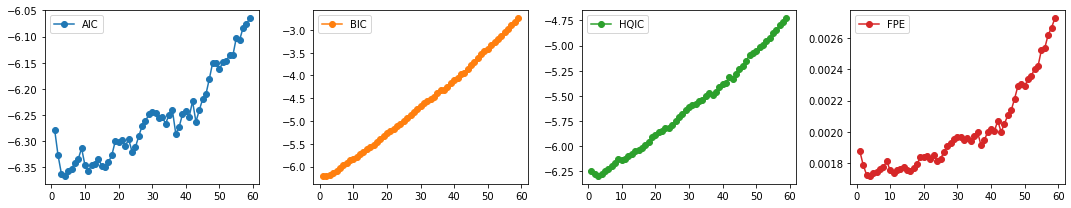

In [30]:
select_p(train_df)

**Result** The result the lowest value attained at around 3 or 4. In this case we will select 4.

We now fit our VAR($p=4$) model.

In [31]:
p = 4
model = VAR(train_df)
var_model = model.fit(p)

### Granger Causality Test

Let's now test the variables for Granger Causality

In [32]:
gmatrix = granger_causation_matrix(train_df,train_df.columns,p,test = 'ssr_ftest')
gmatrix

,Crude Oil_x,Tesla_x
Crude Oil_y,1.0000,0.1939
Tesla_y,0.0003,1.0000


This table summarizes the Granger Causality test for the variables, showing the p-values under the null hypothesis that the column variable G-causes the row variable. 

Here we conclude that Crude Oil G-causes Tesla while Crude Oil does not G-cause Crude Oil given the respective p-values of 0.0003 and 0.1939, respectively, using $\alpha=0.05$.

In [33]:
granger_conclusion(gmatrix)

Crude Oil_x Granger causes Tesla_y
Tesla_x does NOT Granger Crude Oil_y


Next, we will check the coefficients in our VAR Model to see how the variables affect one another.

In [34]:
var_model.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 01, Dec, 2022
Time:                     08:29:10
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -6.14832
Nobs:                     308.000    HQIC:                  -6.27915
Log likelihood:           124.347    FPE:                 0.00171854
AIC:                     -6.36632    Det(Omega_mle):      0.00162234
--------------------------------------------------------------------
Results for equation Crude Oil
                  coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------
const                0.006689         0.005234            1.278           0.201
L1.Crude Oil        -0.037799         0.064964           -0.582           0.561
L1.Tesla            -0.000538         0.011563           -0.

This confirms our results earlier. The first table under 'Results for equation Crude Oil' shows the coefficients of the lagged values if dependent variable is Crude Oil. Note that no coefficient coming from Tesla is significant (p-value < 0.05) and hence, we cannot reject the hypothesis that Tesla stock price does not G-cause Crude Oil.

On the other hand, the results for Tesla shows a lagged value of Crude Oil (L3.Crude Oil) has a significant p-value. Hence confirming that Crude Oil G-causes Tesla stock price.

### Example 2: Household Power Consumption

Here we will use the Household Electric Power Consumption dataset found in https://www.kaggle.com/datasets/uciml/electric-power-consumption-data-set. We will check the Granger Causality among some variables.

In [13]:
DATA_PATH=r'../data/household_power_consumption.txt.zip'

import zipfile

def preprocess_dataset(resolution):
        """Perform preprocessing of the dataset
        Parameters
        ----------
        resolution (string)
        - resolution (e.g., "M" - Monthly, "W" - Weekly, "D" - Daily)

        Output
        ----------
        Time series data 
        """
        with zipfile.ZipFile(DATA_PATH) as power_z:
            with power_z.open("household_power_consumption.txt") as power_data:
                # read the dataset from ./data/household_power_consumption.txt.zip
                df = pd.read_csv(power_data,
                                 sep=';',
                                 parse_dates={'dt': ['Date', 'Time']},
                                 infer_datetime_format=True,
                                 low_memory=False,
                                 na_values=['nan', '?'],
                                 index_col='dt')
        df.columns = [x.lower() for x in df.columns]

        # features
        relevant_columns = [
            "global_active_power", "global_reactive_power", "voltage",
            "global_intensity", "sub_metering_1", "sub_metering_2",
            "sub_metering_3"
        ]

        # Handling missing values
        for every_column in relevant_columns:
            df[every_column] = df[every_column].interpolate()

        # Computation for overall power consumtion
        eq1 = (df['global_active_power'] * 1000 / 60)
        eq2 = df['sub_metering_1'] + \
            df['sub_metering_2'] + df['sub_metering_3']
        df['power_consumption'] = eq1 - eq2
        relevant_columns = df.columns

        # Aggregating level: "M" - Monthly, "W" - Weekly, "D" - Daily
        df = df[relevant_columns].resample(resolution).sum()
        df_power_consumption = df['power_consumption']
        print("DONE: Data Preprocessing")
        return df


Let's check how our data looks like. Here we will use the weekly aggregated data.

In [24]:
data = preprocess_dataset('W')
print(data.head())

DONE: Data Preprocessing
            global_active_power  global_reactive_power     voltage  \
dt                                                                   
2006-12-17             4599.636                260.928   439277.85   
2006-12-24            17477.618               1176.174  2433008.21   
2006-12-31            19749.552               1453.126  2438445.48   
2007-01-07            14961.068               1348.954  2428490.09   
2007-01-14            16179.547               1590.541  2421917.62   

            global_intensity  sub_metering_1  sub_metering_2  sub_metering_3  \
dt                                                                             
2006-12-17           19579.4          2033.0          4733.0         18267.0   
2006-12-24           73994.4         11190.0         21351.0         77447.0   
2006-12-31           83078.0         14312.0         22675.0         67272.0   
2007-01-07           63122.2          5857.0         17599.0         54193.0   
2007

It is interesting to check if the sub-metering levels G-causes power consumption. Note that

**sub_metering_1**: energy sub-metering (in watt-hour of active energy) that corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).

**sub_metering_2**: energy sub-metering (in watt-hour of active energy) that corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.

**sub_metering_3**: energy sub-metering (in watt-hour of active energy) that corresponds to an electric water-heater and an air-conditioner.

In [27]:
df1 = data[['sub_metering_1','power_consumption']]
df2 = data[['sub_metering_2','power_consumption']]
df3 = data[['sub_metering_3','power_consumption']]

Let's check for data quality:

In [29]:
print(df1.isnull().sum())
print(df2.isnull().sum())
print(df3.isnull().sum())

sub_metering_1       0
power_consumption    0
dtype: int64
sub_metering_2       0
power_consumption    0
dtype: int64
sub_metering_3       0
power_consumption    0
dtype: int64


We will check the Granger Causality against sub_metering1.

As usual, let's plot the lag plots to see if stationary.

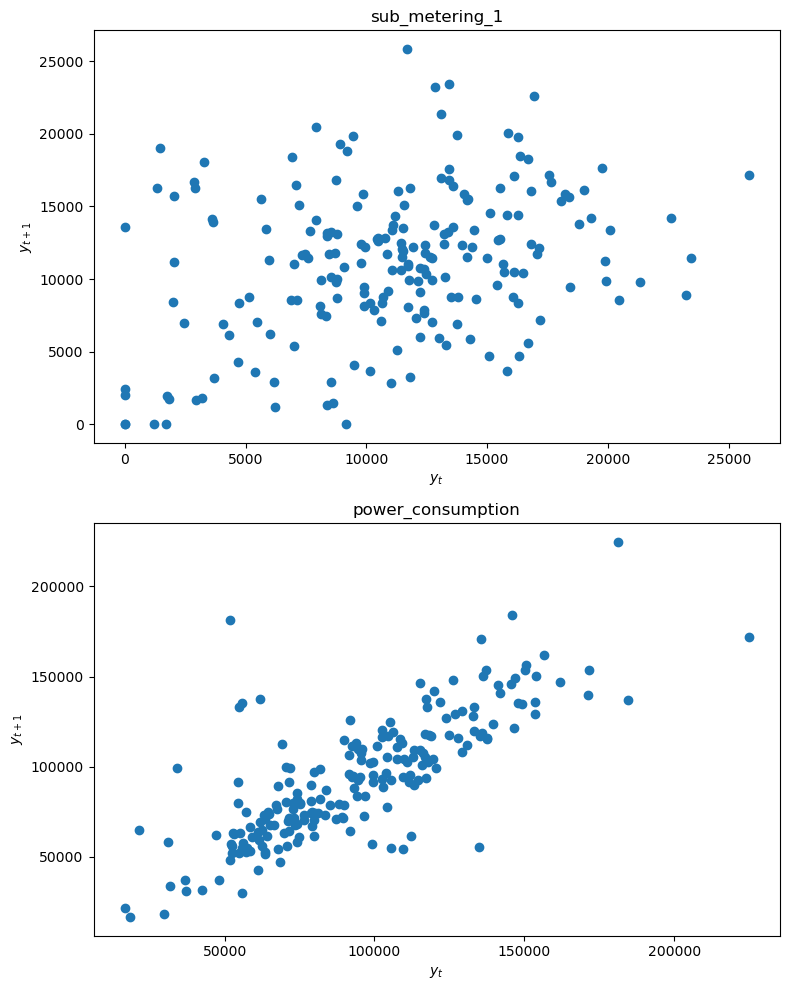

In [30]:
lag_plots(df1)

Both looks stationary. Let's confirm with the ADF and KPSS tests.

In [31]:
print('ADF Test\n')
adf_test(df1)

ADF Test



,sub_metering_1,power_consumption
Test statistic,-5.3685,-4.4514
p-value,0.0,0.0002
Critical value - 1%,-3.4628,-3.4643
Critical value - 5%,-2.8758,-2.8765
Critical value - 10%,-2.5744,-2.5747
result,stationary,stationary


In [32]:
print('KPSS Test\n')
kpss_test(df1)

KPSS Test



,sub_metering_1,power_consumption
Test statistic,0.0345,0.0418
p-value,0.1,0.1
Critical value - 1%,0.216,0.216
Critical value - 2.5%,0.176,0.176
Critical value - 5%,0.146,0.146
Critical value - 10%,0.119,0.119
result,stationary,stationary


Creating the var model

AIC     59
BIC      3
HQIC     3
FPE     17
dtype: int64


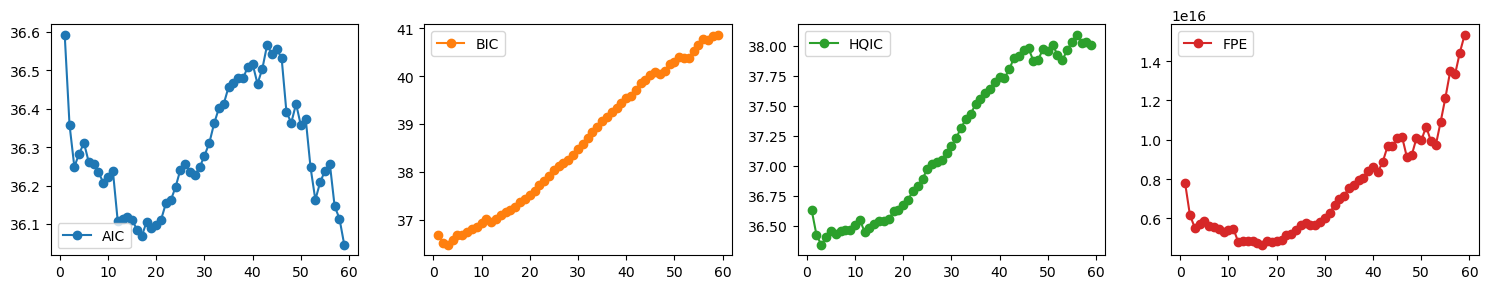

In [34]:
select_p(df1)

Let's use p = 10 on this for efficiency.

In [35]:
p = 10
model = VAR(df1)
var_model = model.fit(p)

In [37]:
gmatrix = granger_causation_matrix(df1,df1.columns,p,test = 'ssr_ftest')
gmatrix

,sub_metering_1_x,power_consumption_x
sub_metering_1_y,1.0000,0.0132
power_consumption_y,0.0059,1.0000


**Result**: Here we see that at 5% confidence level, both variables G-causes the other, implying the presence of a feedback.

I will leave to the reader to continue the test with sub_metering2 and sub_metering3.

References

1. Granger, C. (1969). Investigating Causal Relations by Econometric Models and Cross-spectral Methods. Econometrica, 37(3), 424-438.
2. Leamer, Edward E. (1985). "Vector Autoregressions for Causal Inference?". Carnegie-Rochester Conference Series on Public Policy.
3. Time Series Analysis Handbook: https://phdinds-aim.github.io/time_series_handbook/04_GrangerCausality/04_GrangerCausality.html